# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import requests
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from citipy import citipy
from urllib.parse import quote
%matplotlib notebook 

# Import Keys
from config import weather_api_key



## Generate Cities List

In [2]:
# Create empty list for cities
cities =[]

# Create random lat and lon using numpy.random.uniform for uniform distribution
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)

# Use zip function to combine lat and lng
gcoords = zip(lats, lngs)

#Create for loop to append to list
for gcoord in gcoords:
    city = citipy.nearest_city(gcoord[0], gcoord[1]).city_name
    if city not in cities:
        cities.append(city)
len(cities)

627

In [3]:
#Build partial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api_key

query_url = f"{url}appid={api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
city_name = []
lat = []
lng = []

counter = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")
      
for city in cities:
    response = requests.get(query_url + city).json()
    
    try:
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(response['name'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        print(f"Processing Record {counter} | {city}")
        
        counter = counter + 1
                   
        # To test a small sample to ensure code works
        #if counter == 5:
            #break
    except:
        print(f" City not found. Skipping...")
print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
 City not found. Skipping...
Processing Record 1 | huntsville
Processing Record 2 | murray bridge
 City not found. Skipping...
Processing Record 3 | biskamzha
Processing Record 4 | rikitea
 City not found. Skipping...
Processing Record 5 | lompoc
Processing Record 6 | ushuaia
Processing Record 7 | butaritari
Processing Record 8 | pangody
Processing Record 9 | hamilton
 City not found. Skipping...
Processing Record 10 | mataura
Processing Record 11 | omboue
Processing Record 12 | leningradskiy
Processing Record 13 | kavaratti
Processing Record 14 | tuktoyaktuk
Processing Record 15 | kapaa
Processing Record 16 | lebu
Processing Record 17 | rio grande
Processing Record 18 | vaini
Processing Record 19 | sale
Processing Record 20 | resistencia
Processing Record 21 | tura
Processing Record 22 | tiksi
Processing Record 23 | east london
Processing Record 24 | khandyga
Processing Record 25 | saskylakh
Processing Record 26 | georgetown
Proce

Processing Record 235 | rancho palos verdes
Processing Record 236 | weligama
Processing Record 237 | kodiak
Processing Record 238 | sibolga
Processing Record 239 | marystown
 City not found. Skipping...
Processing Record 240 | acurenam
 City not found. Skipping...
Processing Record 241 | aklavik
Processing Record 242 | santa maria
Processing Record 243 | chara
Processing Record 244 | yulara
Processing Record 245 | eyl
Processing Record 246 | hailar
Processing Record 247 | tahara
Processing Record 248 | akyab
Processing Record 249 | hualmay
 City not found. Skipping...
Processing Record 250 | bawku
Processing Record 251 | pundaguitan
Processing Record 252 | nabire
Processing Record 253 | guarapari
 City not found. Skipping...
Processing Record 254 | bonthe
Processing Record 255 | isangel
Processing Record 256 | vikulovo
Processing Record 257 | potosi
Processing Record 258 | bijar
Processing Record 259 | bubaque
Processing Record 260 | kamina
Processing Record 261 | barra do garcas
Proce

 City not found. Skipping...
Processing Record 462 | poronaysk
Processing Record 463 | barmer
Processing Record 464 | sola
Processing Record 465 | sao filipe
Processing Record 466 | bahia honda
Processing Record 467 | suntar
Processing Record 468 | zambezi
Processing Record 469 | markova
Processing Record 470 | hambantota
Processing Record 471 | klyuchi
Processing Record 472 | pipri
Processing Record 473 | qurayyat
Processing Record 474 | yenagoa
Processing Record 475 | subiaco
Processing Record 476 | valparaiso
Processing Record 477 | umm lajj
Processing Record 478 | yamada
Processing Record 479 | rawson
Processing Record 480 | khakhea
Processing Record 481 | pangnirtung
Processing Record 482 | santa rosa
Processing Record 483 | liuhe
Processing Record 484 | virginia
Processing Record 485 | puqi
 City not found. Skipping...
Processing Record 486 | magnolia
Processing Record 487 | constitucion
Processing Record 488 | ipixuna
Processing Record 489 | sistranda
Processing Record 490 | zen

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [2]:
# Create a data frame, using dict function
weather_dict = {
    "City": city_name,
    "Lat": lat,
    "Lng": lng,
    "Max Temp (F)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness, 
    "Wind Speed (mph)": wind_speed,
    "Country": country,
    "Date": date}

df_weatherpy = pd.DataFrame(weather_dict)
df_weatherpy.count()

NameError: name 'city_name' is not defined

In [26]:
df_weatherpy.to_csv("Weather_Data.csv")

In [6]:
df_weatherpy = pd.read_csv('Weather_Data.csv').drop('Unnamed: 0', axis=1)

df_weatherpy.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Huntsville,34.73,-86.59,79.00,50,1,5.82,US,1602705313
1,Murray Bridge,-35.12,139.27,75.00,37,100,5.99,AU,1602705321
2,Biskamzha,53.45,89.53,32.04,97,100,4.56,RU,1602705336
3,Rikitea,-23.12,-134.97,73.63,80,27,19.46,PF,1602705297
4,Lompoc,34.64,-120.46,96.80,18,1,14.99,US,1602705337


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.
df_weatherpy["Humidity (%)"].sort_values()
# There are no cities in this dataframe that has humidity over 100%

410      8
28       9
376     10
472     11
90      11
      ... 
390    100
158    100
575    100
151    100
238    100
Name: Humidity (%), Length: 579, dtype: int64

In [9]:
df_weatherpy.describe()

,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,5.790000e+02
mean,19.259396,15.840449,63.580984,68.998273,48.069085,8.261554,1.602705e+09
std,32.763466,90.064410,19.516220,22.727854,40.164352,5.408020,8.669996e+01
min,-54.800000,-179.170000,10.670000,8.000000,0.000000,0.540000,1.602705e+09
25%,-7.970000,-63.030000,48.315000,56.000000,1.000000,4.170000,1.602705e+09
50%,22.570000,21.550000,68.000000,76.000000,41.000000,6.930000,1.602705e+09
75%,46.425000,92.690000,78.800000,86.000000,90.000000,11.375000,1.602705e+09
max,78.220000,178.420000,99.000000,100.000000,100.000000,31.180000,1.602706e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

<IPython.core.display.Javascript object>


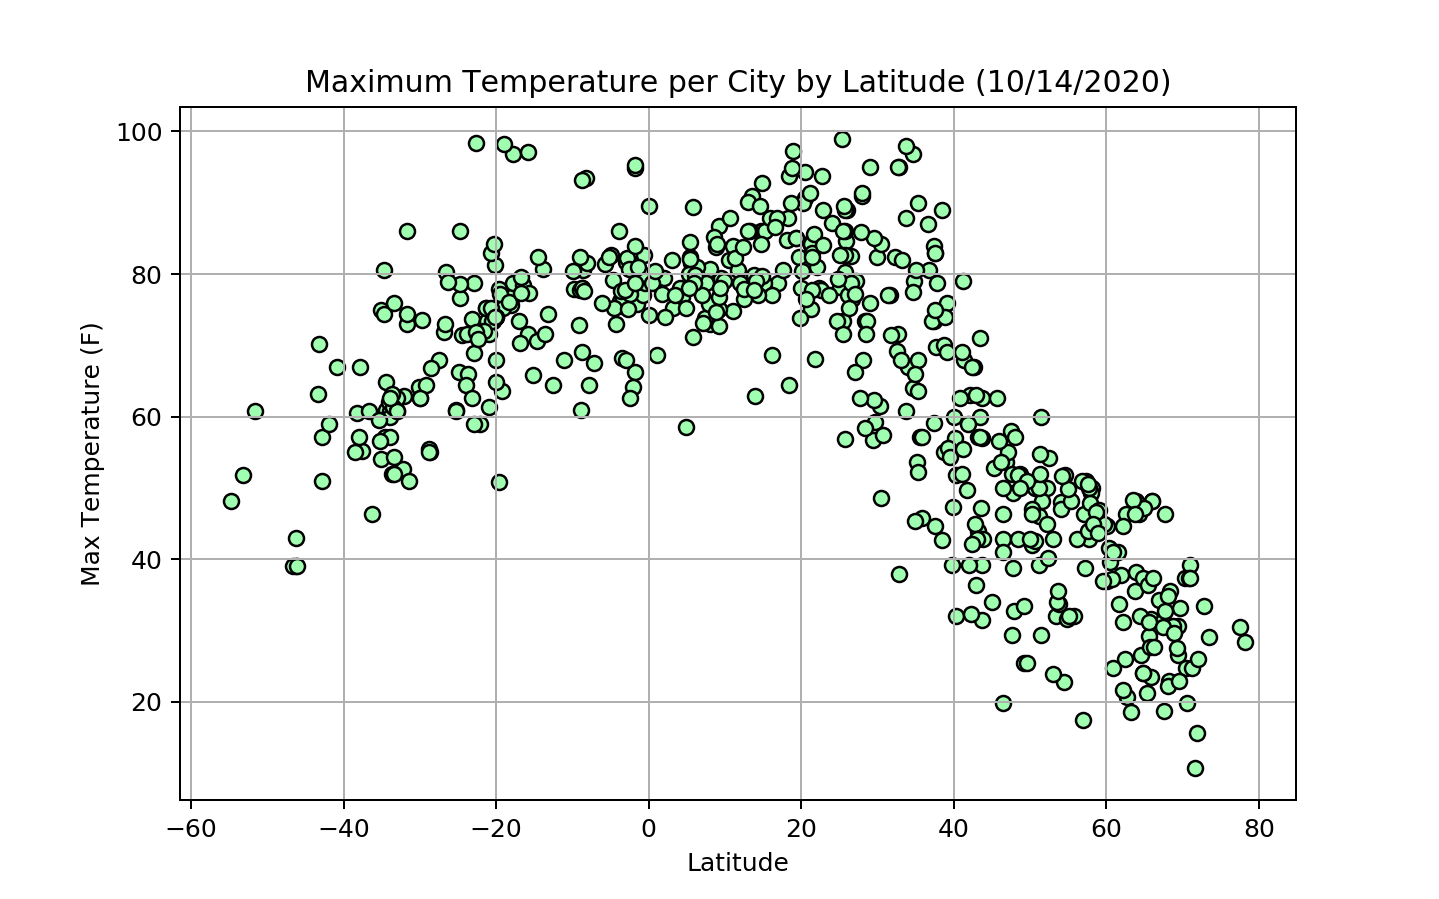

In [24]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(df_weatherpy['Lat'], df_weatherpy['Max Temp (F)'], 
           marker='o', facecolors='#9ffeb0', edgecolor='black')
ax.set(xlabel="Latitude", ylabel="Max Temperature (F)",
      title= "Maximum Temperature per City by Latitude (10/14/2020)")
ax.grid();
# The closer a city is to the equator, or 0 latitude, the warmer the max temperature is.
# As the latitude gets closer to 90, the colder the max temperatures are.

In [12]:
def scatplot(x_values, y_values, x_label, y_label):
    fig, ax = plt.subplots(figsize=(8,5))
    ax.scatter(x_values, y_values, 
               marker='o', facecolors='#9ffeb0', edgecolor='black')
    ax.set(xlabel=x_label, ylabel=y_label,
          )
    ax.grid()

## Latitude vs. Humidity Plot

<IPython.core.display.Javascript object>


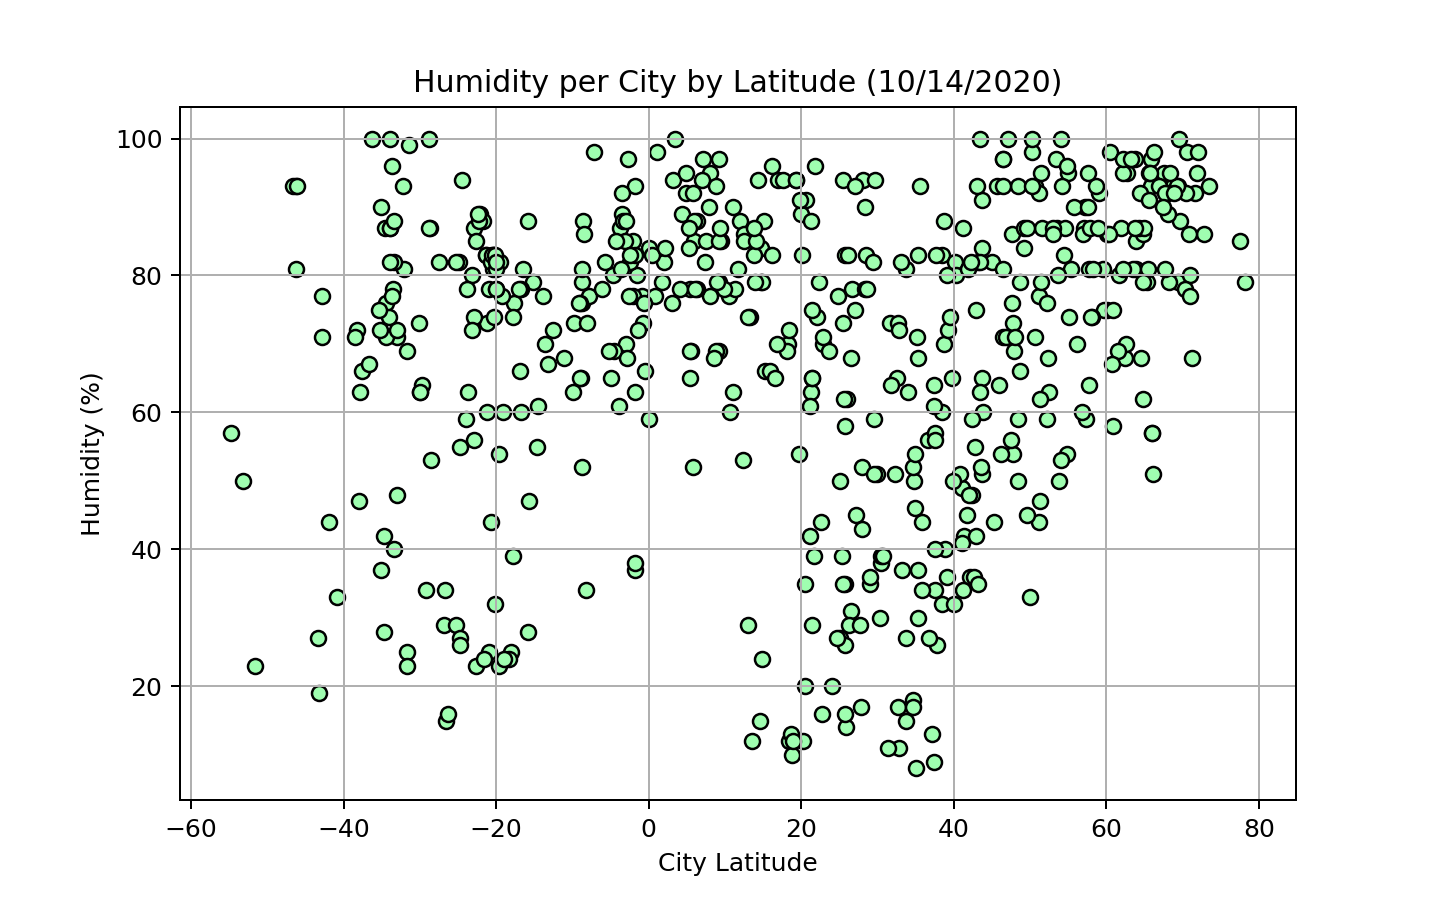

In [25]:
ax2 = scatplot(df_weatherpy['Lat'], df_weatherpy['Humidity (%)'], "City Latitude", "Humidity (%)")
plt.title("Humidity per City by Latitude (10/14/2020)");

## Latitude vs. Cloudiness Plot

<IPython.core.display.Javascript object>


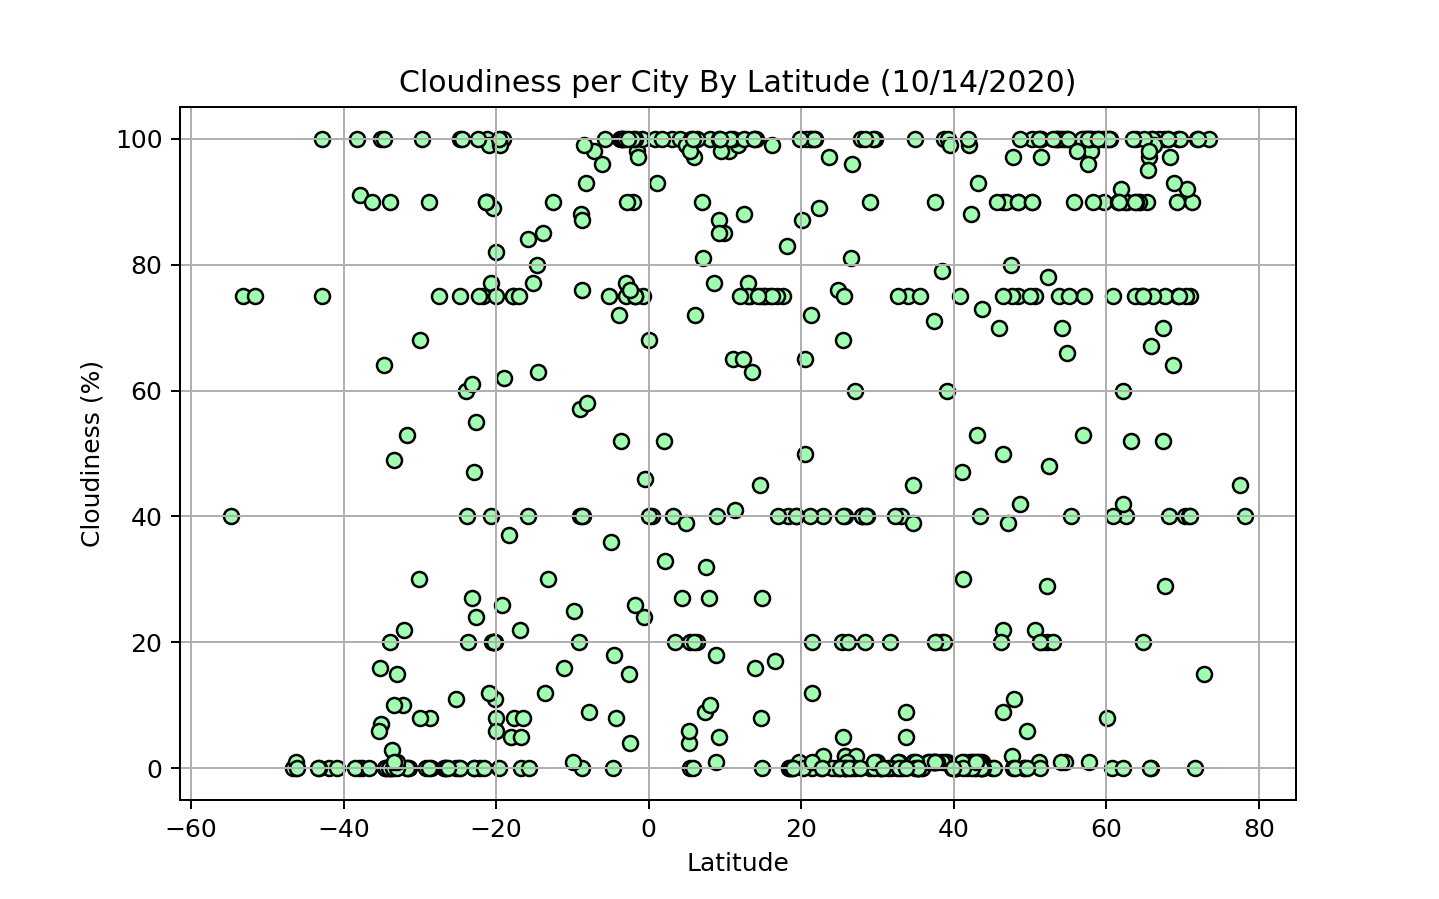

In [26]:
ax3 = scatplot(df_weatherpy['Lat'], df_weatherpy['Cloudiness (%)'], "Latitude", "Cloudiness (%)")
plt.title("Cloudiness per City By Latitude (10/14/2020)");

## Latitude vs. Wind Speed Plot

<IPython.core.display.Javascript object>


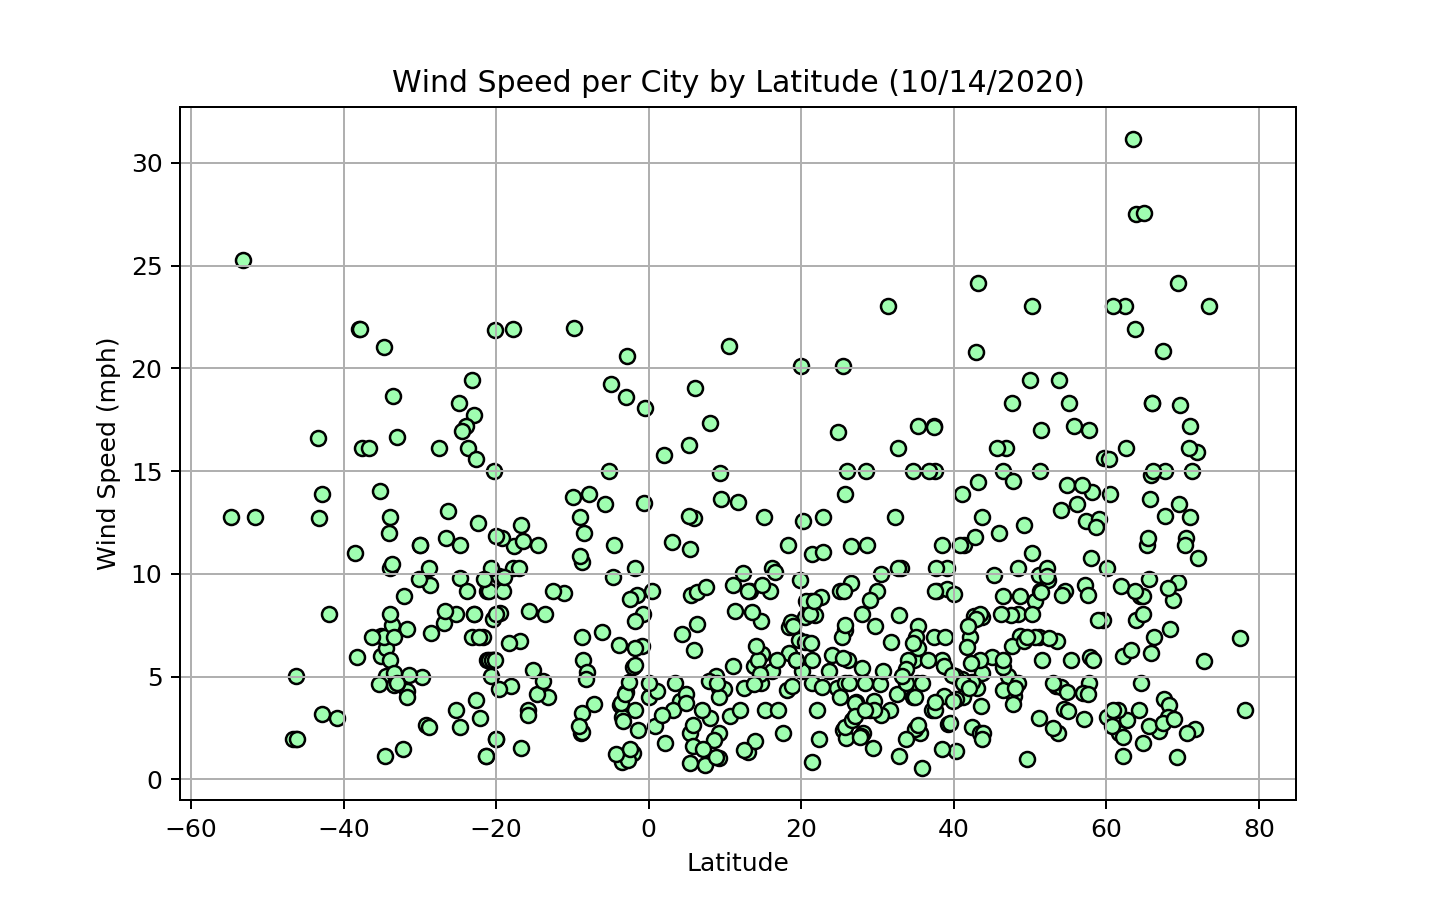

In [28]:
ax4 = scatplot(df_weatherpy['Lat'], df_weatherpy['Wind Speed (mph)'], "Latitude", "Wind Speed (mph)")
plt.title("Wind Speed per City by Latitude (10/14/2020)");

## Linear Regression

In [35]:
# Create df for the two hemispheres

north = df_weatherpy.loc[df_weatherpy['Lat'] >= 0.0]
north.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
0,Huntsville,34.73,-86.59,79.00,50,1,5.82,US,1602705313
2,Biskamzha,53.45,89.53,32.04,97,100,4.56,RU,1602705336
4,Lompoc,34.64,-120.46,96.80,18,1,14.99,US,1602705337
6,Butaritari,3.07,172.79,81.90,76,100,11.54,KI,1602705337
7,Pangody,65.85,74.49,31.57,93,0,14.79,RU,1602705337


In [36]:
south = df_weatherpy.loc[df_weatherpy['Lat'] < 0.0]
south.head()

,City,Lat,Lng,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Country,Date
1,Murray Bridge,-35.12,139.27,75.00,37,100,5.99,AU,1602705321
3,Rikitea,-23.12,-134.97,73.63,80,27,19.46,PF,1602705297
5,Ushuaia,-54.80,-68.30,48.20,57,40,12.75,AR,1602705337
9,Mataura,-46.19,168.86,39.00,93,0,1.99,NZ,1602705295
10,Omboué,-1.57,9.26,75.78,80,98,8.97,GA,1602705338


In [46]:
from scipy import stats
def linregressplot(x_values, y_values, x_label, y_label):
    
    fig, ax = plt.subplots(figsize=(8,5));
    ax.scatter(x_values, y_values, marker="o", color='b');
    ax.set(xlabel=x_label,
          ylabel=y_label);
    
    slope, intercept, rvalue, pvalue, _ = stats.linregress(x_values, y_values)
    y_predicted = [slope*x + intercept for x in x_values]
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    ax.plot(x_values, y_predicted, color='r')
    plt.annotate(line_eq,fontsize=10,color="red")
    
    print(f"The rvalue is {rvalue}.");

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [47]:
ax5= linregressplot(north['Lat'], north['Max Temp (F)'], "Latitude", "Max Temp (F)")
plt.title("Maximum Temperatures for Latitudes in the Northern Hemisphere (10/14/2020)");

<IPython.core.display.Javascript object>

TypeError: annotate() missing 1 required positional argument: 'xy'

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression